In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cols = ['LoanAmount','Loan_Amount_Term','Credit_History','Gender','Married','Self_Employed','Dependents']

for i in cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# loan amount for months :
df.Loan_Amount_Term=df.Loan_Amount_Term / 12
df.Loan_Amount_Term = df.Loan_Amount_Term.astype('int')
df.sample(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
239,Male,Yes,1,Graduate,No,3315,0.0,96.0,30,1.0,Semiurban,Y
145,Female,Yes,0,Graduate,No,2330,4486.0,100.0,30,1.0,Semiurban,Y
248,Male,Yes,1,Graduate,No,2882,1843.0,123.0,40,1.0,Semiurban,Y
378,Male,No,0,Graduate,No,3069,0.0,71.0,40,1.0,Urban,N
360,Female,No,1,Graduate,No,4723,0.0,81.0,30,1.0,Semiurban,N
307,Female,No,0,Graduate,No,2400,1863.0,104.0,30,0.0,Urban,N


In [7]:
df.Dependents = df.Dependents.str.split('+').str[0]
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
53,Male,Yes,2,Graduate,No,4616,0.0,134.0,30,1.0,Urban,N
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,30,1.0,Semiurban,Y
570,Male,Yes,1,Graduate,No,3417,1750.0,186.0,30,1.0,Urban,Y
222,Male,No,0,Graduate,No,2971,2791.0,144.0,30,1.0,Semiurban,Y
211,Male,Yes,3,Graduate,No,3430,1250.0,128.0,30,0.0,Semiurban,N


In [8]:
df.ApplicantIncome = df.ApplicantIncome/100
df.CoapplicantIncome = df.CoapplicantIncome/100
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,58.49,0.00,120.0,30,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,45.83,15.08,128.0,30,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,30.00,0.00,66.0,30,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,25.83,23.58,120.0,30,1.0,Urban,Y
4,Male,No,0,Graduate,No,60.00,0.00,141.0,30,1.0,Urban,Y


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
def outliers_shape(col_name):
    try :
            # Finding the IQR
            percentile25 = df[col_name].quantile(0.25)
            percentile75 = df[col_name].quantile(0.75)
            iqr = percentile75 - percentile25
            
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            
            
            # Finding Outliers
            size = df[df[col_name] > upper_limit]

            print(size.shape)
            
    except Exception as e :
        print('error is : ', e)

In [11]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(50, 12)
(18, 12)
(41, 12)


In [12]:
def cap_outliers (col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(
        df[col] > upper_limit,
        upper_limit,
        np.where(
            df[col] < lower_limit,
            lower_limit,
            df[col]
        )
    )

In [13]:
colss = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in colss:
    cap_outliers(i)

In [14]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(0, 12)
(0, 12)
(0, 12)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

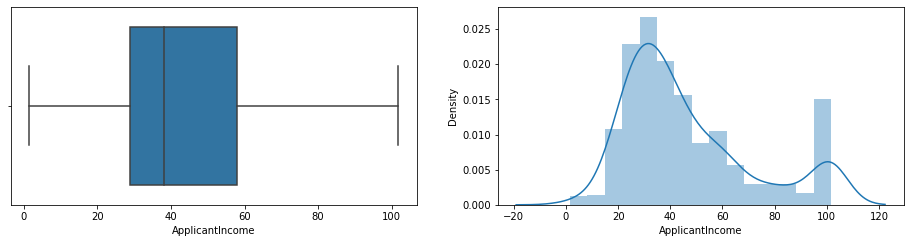

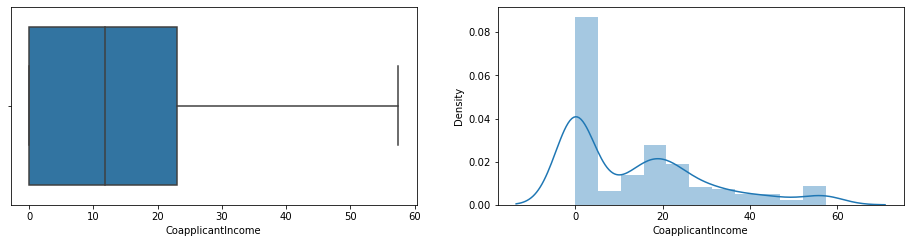

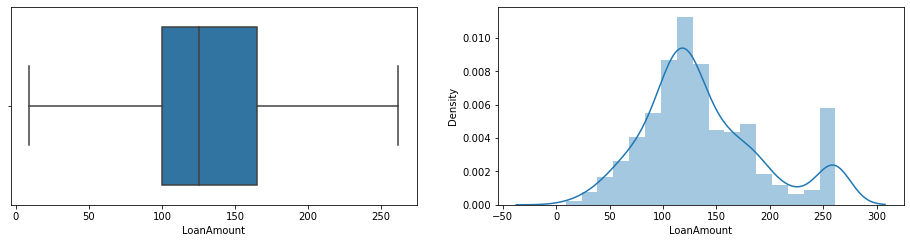

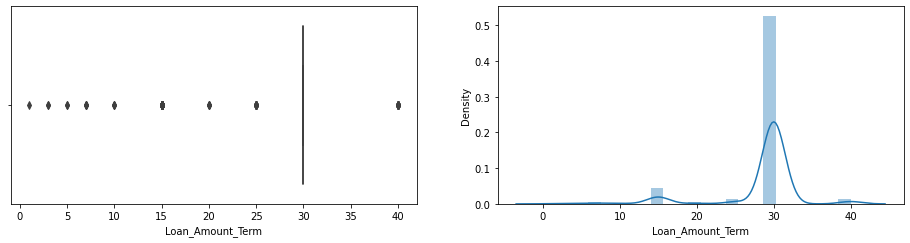

In [15]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.subplot(2,2,d)
    sns.distplot(df[i])
    c=c+2
    d=d+1

In [16]:
cols = ['LoanAmount','Loan_Amount_Term','Dependents','Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
for i in cols:
    df[i] = df[i].astype('int')

In [17]:
df.drop(columns=['Dependents'], inplace =True)
df.shape

(614, 11)

In [18]:
df1=df.copy()
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,58,0,120,30,1,Urban,Y
1,Male,Yes,Graduate,No,45,15,128,30,1,Rural,N
2,Male,Yes,Graduate,Yes,30,0,66,30,1,Urban,Y
3,Male,Yes,Not Graduate,No,25,23,120,30,1,Urban,Y
4,Male,No,Graduate,No,60,0,141,30,1,Urban,Y


In [19]:
df1.head(4)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,58,0,120,30,1,Urban,Y
1,Male,Yes,Graduate,No,45,15,128,30,1,Rural,N
2,Male,Yes,Graduate,Yes,30,0,66,30,1,Urban,Y
3,Male,Yes,Not Graduate,No,25,23,120,30,1,Urban,Y


In [20]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df1[df.Loan_Status=='Y']
df_minority = df1[df.Loan_Status=='N']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=65) # reproducible results

# Combine majority class with upsampled minority class
final_df = pd.concat([df_majority, df_minority_upsampled])
final_df.Loan_Status.value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [21]:
# train_test_split
from sklearn.model_selection import train_test_split

X=final_df.drop(columns=(['Loan_Status']))
#y=df1.Loan_Status.replace({"Y":1, "N":0})
y = final_df.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape

((675, 10), (169, 10))

In [22]:
X_train.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
94,Male,No,Not Graduate,No,36,0,25,10,1,Semiurban
269,Female,No,Graduate,No,28,15,90,30,1,Urban
515,Male,Yes,Graduate,No,34,34,150,30,1,Rural


In [23]:
y_train

94     Y
269    Y
515    Y
213    Y
589    N
      ..
418    Y
233    Y
315    Y
249    Y
422    Y
Name: Loan_Status, Length: 675, dtype: object

In [24]:
X_train.head(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
94,Male,No,Not Graduate,No,36,0,25,10,1,Semiurban
269,Female,No,Graduate,No,28,15,90,30,1,Urban


In [25]:
#from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#oe = OrdinalEncoder()
#le = LabelEncoder()

#oe_cols = ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area']

#X_train[oe_cols] = oe.fit_transform(X_train[oe_cols])
#X_test[oe_cols] = oe.fit_transform(X_test[oe_cols])

#y_train = le.fit_transform(y_train)
#y_test = le.fit_transform(y_test)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

In [27]:
oe = OrdinalEncoder()
le = LabelEncoder()
algo = LogisticRegression()

oe_cols = ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area']
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

X_train[oe_cols] = oe.fit_transform(X_train[oe_cols])
X_test[oe_cols] = oe.transform(X_test[oe_cols])

X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
94,1.0,0.0,1.0,0.0,36,0,25,10,1,1.0
269,0.0,0.0,0.0,0.0,28,15,90,30,1,2.0
515,1.0,1.0,0.0,0.0,34,34,150,30,1,0.0
213,1.0,1.0,1.0,1.0,57,0,130,30,1,0.0
589,1.0,1.0,0.0,1.0,27,0,106,30,0,1.0


In [28]:
X_train.head(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
94,1.0,0.0,1.0,0.0,36,0,25,10,1,1.0
269,0.0,0.0,0.0,0.0,28,15,90,30,1,2.0


In [67]:
# logistic reression

algo.fit(X_train, y_train)
y_pred = algo.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))


Accuracy score :  0.6863905325443787
Confusion matrix :  [[46 44]
 [ 9 70]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
X_train.sample()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
53,1.0,1.0,0.0,0.0,46,0,134,30,1,2.0


In [69]:
final_df[final_df.index == 602]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
602,Male,Yes,Graduate,No,57,0,128,30,1,Urban,Y


In [70]:
algo.predict([[1, 1, 0, 0, 0, 0, 128,30,1 ,2]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [71]:
# Decision tree classifier

m1 = DecisionTreeClassifier()

m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))


Accuracy score :  0.8224852071005917
Confusion matrix :  [[76 14]
 [16 63]]


In [72]:
m1.predict([[1, 1, 0, 0, 3, 0, 128,30,1 ,2]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [73]:
# Random forest classifier

m2 = RandomForestClassifier()

m2.fit(X_train, y_train)
y_pred = m2.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))


Accuracy score :  0.8402366863905325
Confusion matrix :  [[73 17]
 [10 69]]


In [74]:
m2.predict([[1, 1, 0, 0, 110, 150, 228,30,0 ,0]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [75]:
# Gradient boosting

m3 = GradientBoostingClassifier()

m3.fit(X_train, y_train)
y_pred = m3.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))


Accuracy score :  0.7514792899408284
Confusion matrix :  [[60 30]
 [12 67]]


In [76]:
m3.predict([[1, 1, 0, 0, 58, 0, 144,30,1 ,2]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [77]:
# Adaboost

m4 = AdaBoostClassifier()

m4.fit(X_train, y_train)
y_pred = m4.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))


Accuracy score :  0.6686390532544378
Confusion matrix :  [[50 40]
 [16 63]]


In [78]:
m4.predict([[1, 1, 0, 0, 58, 0, 144,30, 1,2]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1])

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'max_depth': [1,2,3,4, 5,6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35],
              'min_samples_leaf': [1,2,3,4, 5,6, 7, 8,9],
              'criterion': ['gini', 'entropy']}

# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the test set
print("Test set score: ", grid_search.score(X_test, y_test))

Best parameters:  {'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 1}
Best score:  0.8385185185185184
Test set score:  0.7928994082840237


In [110]:
# decision tree classifier after hyperparameter tuning

m5 = DecisionTreeClassifier(criterion='entropy', max_depth=33, min_samples_leaf=1)

m5.fit(X_train, y_train)
y_pred = m5.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))


Accuracy score :  0.8461538461538461
Confusion matrix :  [[77 13]
 [13 66]]


In [111]:
# Random forest classifier tuning

from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth': [1, 7, 8, 9,13,15,18,20,23,25,28,30],
              'min_samples_leaf': [1, 2],
              'criterion': ['gini', 'entropy']}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the test set
print("Test set score: ", grid_search.score(X_test, y_test))


Best parameters:  {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score:  0.8770370370370371
Test set score:  0.863905325443787


In [138]:
# Random forest classifier after hyperparameter tuning

m6 = RandomForestClassifier(criterion='entropy',max_depth=18,min_samples_leaf=1,n_estimators=100)

m6.fit(X_train, y_train)
y_pred = m6.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))

Accuracy score :  0.8579881656804734
Confusion matrix :  [[73 17]
 [ 7 72]]


In [139]:
# voting classifier :

rf = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=1, n_estimators=250)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=1)

ensemble = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='hard')

ensemble.fit(X_train, y_train)

print("Test set score: ", ensemble.score(X_test, y_test))
print("Accuracy score : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : ", confusion_matrix(y_test, y_pred))

Test set score:  0.8047337278106509
Accuracy score :  0.8579881656804734
Confusion matrix :  [[73 17]
 [ 7 72]]


In [130]:
X_train.sample()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
258,1.0,1.0,0.0,0.0,101,21,261,30,1,0.0


In [131]:
final_df[final_df.index == 258]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
258,Male,Yes,Graduate,No,101,21,261,30,1,Rural,N
258,Male,Yes,Graduate,No,101,21,261,30,1,Rural,N


In [141]:
ensemble.predict([[1,1,0,0,101,21,261,30,1,1]])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [150]:
import pickle

pickle.dump(final_df,open('df1.pkl','wb'))
pickle.dump(ensemble,open('mod6.pkl','wb'))

In [142]:
final_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,58,0,120,30,1,Urban,Y
2,Male,Yes,Graduate,Yes,30,0,66,30,1,Urban,Y
3,Male,Yes,Not Graduate,No,25,23,120,30,1,Urban,Y
4,Male,No,Graduate,No,60,0,141,30,1,Urban,Y
5,Male,Yes,Graduate,Yes,54,41,261,30,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
53,Male,Yes,Graduate,No,46,0,134,30,1,Urban,N
286,Female,No,Graduate,Yes,26,17,99,25,1,Semiurban,N
346,Male,Yes,Not Graduate,No,35,32,152,30,0,Rural,N
416,Female,No,Graduate,No,26,0,160,30,1,Urban,N


### categorical values:
#### gender: male-1
#### married : yes-1
#### Education : graduate -1
#### Self_employed : yes - 1
#### property_area : urban-2 : rural-0 : Semiurban:1

In [146]:
X_train[X_train.index == 0]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,58,0,120,30,1,2.0


In [147]:
X_train[X_train.index == 346]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
346,1.0,1.0,1.0,0.0,35,32,152,30,0,0.0
346,1.0,1.0,1.0,0.0,35,32,152,30,0,0.0


In [148]:
X_train[X_train.index == 286]

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
286,0.0,0.0,0.0,1.0,26,17,99,25,1,1.0
286,0.0,0.0,0.0,1.0,26,17,99,25,1,1.0


In [151]:
!pip show sklearn

Name: sklearn
Version: 0.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://pypi.python.org/pypi/scikit-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: 
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: scikit-learn
Required-by: 


In [152]:
!pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: 
Required-by: xgboost, wordcloud, visions, tensorflow-intel, tensorboard, streamlit, statsmodels, seaborn, scipy, scikit-learn, PyWavelets, pydeck, pyarrow, phik, patsy, pandas, pandas-profiling, opt-einsum, opencv-python, numexpr, mkl-random, mkl-fft, missingno, matplotlib, ImageHash, h5py, cufflinks, Bottleneck, altair, aif360
